In [3]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [73]:
import pandas as pd
import altair as alt

import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [43]:
pd.options.display.float_format = "{:.2f}".format

# Explore Article Data

In [11]:
df = pd.read_csv("../data/articles.csv")

In [12]:
df.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [13]:
df.shape

(105542, 25)

In [26]:
df.isna().mean()

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

In [24]:
df.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

## Product-Article Relationship

In [89]:
df_product_article = df.groupby(["product_code", "prod_name"]).agg(
    group_size=("article_id", "count"), num_unique_articles=("article_id", "nunique")
)

In [90]:
(df_product_article["group_size"] != df_product_article["num_unique_articles"]).max()

False

In [91]:
df_product_article["num_unique_articles"].describe()

count   49812.00
mean        2.12
std         2.19
min         1.00
25%         1.00
50%         1.00
75%         2.00
max        70.00
Name: num_unique_articles, dtype: float64

In [92]:
df_product_article["num_unique_articles"].sort_values(ascending=False).head(3)

product_code  prod_name           
684021        Wow printed tee 6.99    70
783707        1pk Fun                 55
699923        Mike tee                52
Name: num_unique_articles, dtype: int64

## Section-Product Relationship

In [85]:
df_section_product = (
    df.groupby(["section_no", "section_name"])
    .agg(
        num_unique_products=("product_code", "nunique"),
        num_unique_articles=("article_id", "nunique"),
    )
    .sort_values(by="num_unique_products", ascending=False)
    .reset_index()
).melt(
    id_vars=["section_no", "section_name"],
    value_vars=["num_unique_products", "num_unique_articles"],
)

In [87]:
alt.Chart(df_section_product).mark_bar().encode(
    y=alt.Y("section_name", sort="-x"), x="value", column="variable"
)

alt.Chart(...)

## Product Type and Group

In [117]:
df_product_type = (
    df.groupby(["product_type_no", "product_type_name"])
    .agg(
        num_unique_products=("product_code", "nunique"),
        num_unique_articles=("article_id", "nunique"),
    )
    .sort_values("num_unique_articles", ascending=False)
)

df_product_type.describe()

,num_unique_products,num_unique_articles
count,132.00,132.00
mean,360.14,799.56
std,805.42,1834.37
min,1.00,1.00
25%,4.75,7.00
50%,50.00,104.50
75%,356.75,685.75
max,5551.00,11169.00


In [118]:
df_product_type.head(5)

,,num_unique_products,num_unique_articles
product_type_no,product_type_name,,
272,Trousers,4711,11169
265,Dress,5551,10362
252,Sweater,3618,9302
255,T-shirt,2172,7904
254,Top,1893,4155


<AxesSubplot:ylabel='Frequency'>

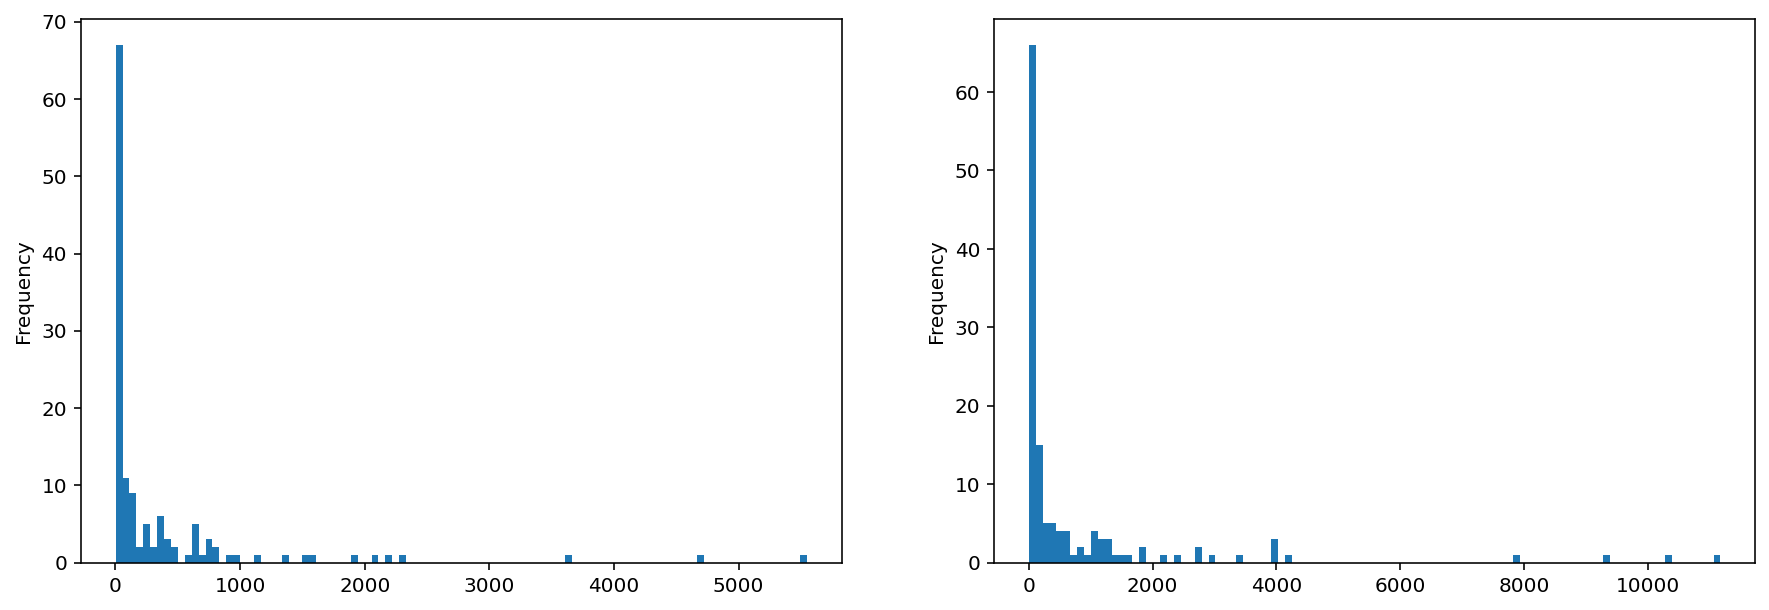

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

df_product_type["num_unique_products"].plot.hist(bins=100, ax=axs[0])
df_product_type["num_unique_articles"].plot.hist(bins=100, ax=axs[1])

In [120]:
df["product_group_name"].value_counts()

Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: product_group_name, dtype: int64

## Graphical Appearance

In [129]:
df_graphical_app = (
    df.groupby(["graphical_appearance_no", "graphical_appearance_name"])
    .agg(
        num_unique_products=("product_code", "nunique"),
        num_unique_articles=("article_id", "nunique"),
    )
    .reset_index()
    .melt(
        id_vars=["graphical_appearance_no", "graphical_appearance_name"],
        value_vars=["num_unique_products", "num_unique_articles"],
    )
)

In [131]:
alt.Chart(df_graphical_app).mark_bar().encode(
    y=alt.Y("graphical_appearance_name", sort="-x"), x="value", column="variable"
)

alt.Chart(...)

## Colors

In [132]:
df_colors = (
    df.groupby(["colour_group_code", "colour_group_name"])
    .agg(
        num_unique_products=("product_code", "nunique"),
        num_unique_articles=("article_id", "nunique"),
    )
    .reset_index()
    .melt(
        id_vars=["colour_group_code", "colour_group_name"],
        value_vars=["num_unique_products", "num_unique_articles"],
    )
)

In [135]:
alt.Chart(df_colors).mark_bar().encode(
    y=alt.Y("colour_group_name", sort="-x"), x="value", column="variable"
)

alt.Chart(...)

## Perceived Colors (Value)

In [145]:
df_perc_colors_value = (
    df.groupby(["perceived_colour_value_id", "perceived_colour_value_name"])
    .agg(
        num_unique_products=("product_code", "nunique"),
        num_unique_articles=("article_id", "nunique"),
    )
    .reset_index()
    .melt(
        id_vars=["perceived_colour_value_id", "perceived_colour_value_name"],
        value_vars=["num_unique_products", "num_unique_articles"],
    )
)

In [146]:
alt.Chart(df_perc_colors_value).mark_bar().encode(
    y=alt.Y("perceived_colour_value_name", sort="-x"), x="value", column="variable"
)

alt.Chart(...)

## Perceived Colors (Master)

In [150]:
df_perc_colors_master = (
    df.groupby(["perceived_colour_master_id", "perceived_colour_master_name"])
    .agg(
        num_unique_products=("product_code", "nunique"),
        num_unique_articles=("article_id", "nunique"),
    )
    .reset_index()
    .melt(
        id_vars=["perceived_colour_master_id", "perceived_colour_master_name"],
        value_vars=["num_unique_products", "num_unique_articles"],
    )
)

In [151]:
alt.Chart(df_perc_colors_master).mark_bar().encode(
    y=alt.Y("perceived_colour_master_name", sort="-x"), x="value", column="variable"
)

alt.Chart(...)

## Department

In [154]:
df_department = (
    df.groupby(["department_no", "department_name"])
    .agg(
        num_unique_products=("product_code", "nunique"),
        num_unique_articles=("article_id", "nunique"),
    )
    .sort_values("num_unique_articles", ascending=False)
)

In [157]:
df_department.head(10)

,,num_unique_products,num_unique_articles
department_no,department_name,,
7616,Kids Girl Jersey Fancy,676,2032
1338,Expressive Lingerie,829,1921
8716,Young Girl Jersey Fancy,591,1874
4242,Swimwear,801,1839
7648,Kids Boy Jersey Fancy,498,1488
1640,Tops Fancy Jersey,570,1429
1636,Jersey fancy,580,1402
1676,Jersey Basic,426,1359
1344,Dresses,598,1354


In [158]:
df_department.tail(10)

,,num_unique_products,num_unique_articles
department_no,department_name,,
2932,Baby Boy Local Relevance,1,3
1727,Test Ladies,2,3
5454,Suit Extended inactive from s1,3,3
3939,Shoes Other,2,2
1620,Jersey inactive from S.6,1,1
5787,Shirt Extended inactive from s1,1,1
8398,Woven bottoms inactive from S.7,1,1
3943,EQ Divided Blue,1,1
7659,Kids Boy License,1,1


## Index

In [162]:
df_index = (
    df.groupby(["index_code", "index_name"])
    .agg(
        num_unique_products=("product_code", "nunique"),
        num_unique_articles=("article_id", "nunique"),
        num_unique_articles=("article_id", "nunique"),
    )
    .sort_values("num_unique_articles", ascending=False)
)

In [163]:
df_index

,,num_unique_products,num_unique_articles
index_code,index_name,,
A,Ladieswear,13457,26001
D,Divided,6808,15149
F,Menswear,4429,12553
H,Children Sizes 92-140,4237,12007
I,Children Sizes 134-170,3237,9214
G,Baby Sizes 50-98,3995,8875
C,Ladies Accessories,4002,6961
B,Lingeries/Tights,2917,6775
J,"Children Accessories, Swimwear",2779,4615


## Index Group

In [170]:
df_index_group = (
    df.groupby(["index_group_no", "index_group_name"])
    .agg(
        num_unique_products=("product_code", "nunique"),
        num_unique_articles=("article_id", "nunique"),
        num_unique_index_codes=("index_code", "unique"),
        num_unique_index_names=("index_name", "unique"),
    )
    .sort_values("num_unique_articles", ascending=False)
)

In [171]:
df_index_group

,,num_unique_products,num_unique_articles,num_unique_index_codes,num_unique_index_names
index_group_no,index_group_name,,,,
1,Ladieswear,20373,39737,"[A, B, C]","[Ladieswear, Lingeries/Tights, Ladies Accessor..."
4,Baby/Children,14241,34711,"[G, H, I, J]","[Baby Sizes 50-98, Children Sizes 92-140, Chil..."
2,Divided,6808,15149,[D],[Divided]
3,Menswear,4429,12553,[F],[Menswear]
26,Sport,1463,3392,[S],[Sport]


## Garment Group

In [174]:
df_garment = (
    df.groupby(["garment_group_no", "garment_group_name"])
    .agg(
        num_unique_products=("product_code", "nunique"),
        num_unique_articles=("article_id", "nunique"),
    )
    .sort_values("num_unique_articles", ascending=False)
)

In [175]:
df_garment

,,num_unique_products,num_unique_articles
garment_group_no,garment_group_name,,
1005,Jersey Fancy,8602,21445
1019,Accessories,6606,11519
1002,Jersey Basic,1813,8126
1003,Knitwear,3120,7490
1017,"Under-, Nightwear",2552,7441
1009,Trousers,3015,6727
1010,Blouses,3079,5838
1020,Shoes,2683,5145
1013,Dresses Ladies,2520,4874


## Detail Description

In [177]:
df["detail_desc"].sample(10)

23707     Top in soft jersey made from a viscose blend w...
70365     Top in soft, ribbed jersey made from a cotton ...
46406     Hoodie in sweatshirt fabric made from a cotton...
55369     Short dress in ribbed jersey with a turtle nec...
17221     Fitted short-sleeved top in slub jersey made f...
3465      Joggers in washed denim with an elasticated dr...
72403     Trunks in stretch cotton jersey with flatlock ...
102749    Fitted jumper in a ribbed viscose blend with a...
67150     Sunglasses with plastic frames and UV-protecti...
40049     Blouse in airy crêpe with a small stand-up col...
Name: detail_desc, dtype: object